In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import imageio
import glob
import math

### Task1.1

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [4]:
#read the image data , choose 1000 samples in first three image sets

#Store the image data in X, the shape of X is (784,3000)

path='D:/python data/mnist_train/mnist/'
N=1000
subsets=['d0','d1','d2']
X=np.zeros((784,3*N))
C=np.zeros((3*N,3))
for i,subname in enumerate(subsets):
    val_rgb=np.zeros((3,))
    val_rgb[i]=1.0
    
    for j in range(N):
        image=imageio.imread(glob.glob(path+subname+'/*')[j]).ravel()
        X[:,i*N+j]=np.float64(image)
        C[i*N+j,:]=val_rgb

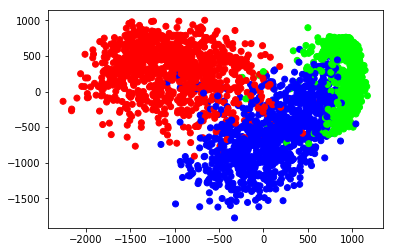

In [5]:
#Medthod of linear PCA

S1=linear_pca(X,2)

#reorder indexes for visualization purposes

idx_new=((np.arange(3*N).reshape(3,N).T)).ravel()
plt.scatter(S1[0,idx_new],S1[1,idx_new],c=C[idx_new])
plt.show()

### Task1.2

In [6]:
#function: compute the Gramm-matrix with linear kernel
#(which means there is no difference with linear PCA)

def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    N=3000
    H=np.eye(N)-np.ones([N,1])*np.ones([1,N])/N
    K_c=np.matmul(H,np.matmul(K,H))
    [U,Sigma,VT]=np.linalg.svd(K_c,full_matrices=False)
    S=np.expand_dims(np.sqrt(Sigma)[:k],axis=1)*VT[:k,:]
    return S

### Task1.3

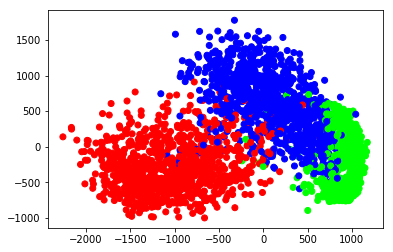

In [7]:
#Method of Kernel-PCA
#The kernel is linear kernel

S2=gram_pca(np.matmul(X.T,X), 2)
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(S2[0,idx_new],S2[1,idx_new],c=C[idx_new])
plt.show()

### Task 1.4

In [8]:
#function: calculate the gaussian kernel result between two image datas

def gaussian_kernel(x,y,sigma):
    dist=np.linalg.norm(x-y)**2
    result=np.exp(-dist/(2*(sigma**2)))
    return result

In [9]:
#function: compute the Gram-matrix with Gaussian-kernel

def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    N=1000
    K=np.zeros((N*3,N*3))
    for i in range(0,N*3):
        for j in range(0,N*3):
            K[i,j]=gaussian_kernel(X[:,i],X[:,j],sigma)
            
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

### Task1.5

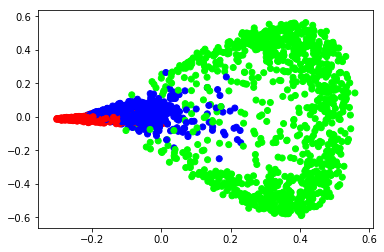

In [10]:
#Method of Kernel-PCA
#The kernel is Gaussian kernel

S3=gaussian_kernel_pca(X, 2, 1000)
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(S3[0,idx_new],S3[1,idx_new],c=C[idx_new])
plt.show()